# Stock Price Predictor

#### Import the required libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import yfinance as yf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import os
from datetime import datetime
import warnings 
warnings.filterwarnings("ignore")

#### Enter the company name

In [2]:
company = 'Rail Vikas Nigam Ltd.'

#### Load the dataset

In [3]:
data = pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\Projects\Stock Price Prediction\RVNL.NS.csv")

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

#### Plotting the price data of the company

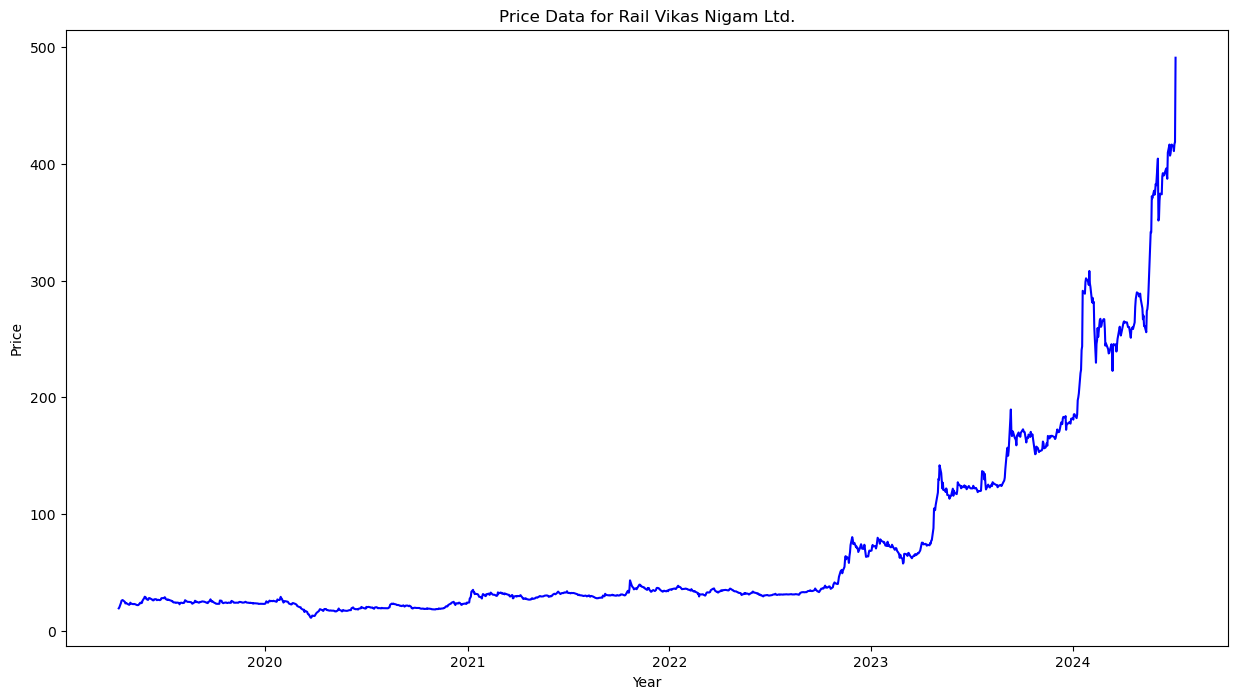

In [5]:
plt.figure(figsize = (15, 8))
plt.plot(data['Date'], data['Close'], color = "blue")
plt.title(f"Price Data for {company}")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

#### Printing current date's highest, lowest, opening and closing price and 52-week highest and lowest price

In [6]:
current_date = data['Date'].max()
today_data = data[data['Date'] == current_date]

if not today_data.empty:
    current_open = today_data['Open'].values[0]
    current_close = today_data['Close'].values[0]
    current_high = today_data['High'].values[0]
    current_low = today_data['Low'].values[0]

    one_year_ago = current_date - pd.DateOffset(years=1)
    last_52_weeks_data = data[data['Date'] >= one_year_ago]
    high_52_week = last_52_weeks_data['Close'].max()
    low_52_week = last_52_weeks_data['Close'].min()

    print(f"Current Date: {current_date.strftime('%Y-%m-%d')}")
    
    print(f"Today's High: {current_high:.2f}")
    print(f"Today's Low: {current_low:.2f}")
    
    print(f"Opening Price: {current_open:.2f}") 
    print(f"Closing Price: {current_close:.2f}")
    
    print(f"52-Week High: {high_52_week:.2f}")
    print(f"52-Week Low: {low_52_week:.2f}")
    
else:
    print("No data available for the current date.")

Current Date: 2024-07-05
Today's High: 498.50
Today's Low: 424.55
Opening Price: 424.95
Closing Price: 491.05
52-Week High: 491.05
52-Week Low: 118.65


#### Plotting the volume data of the company

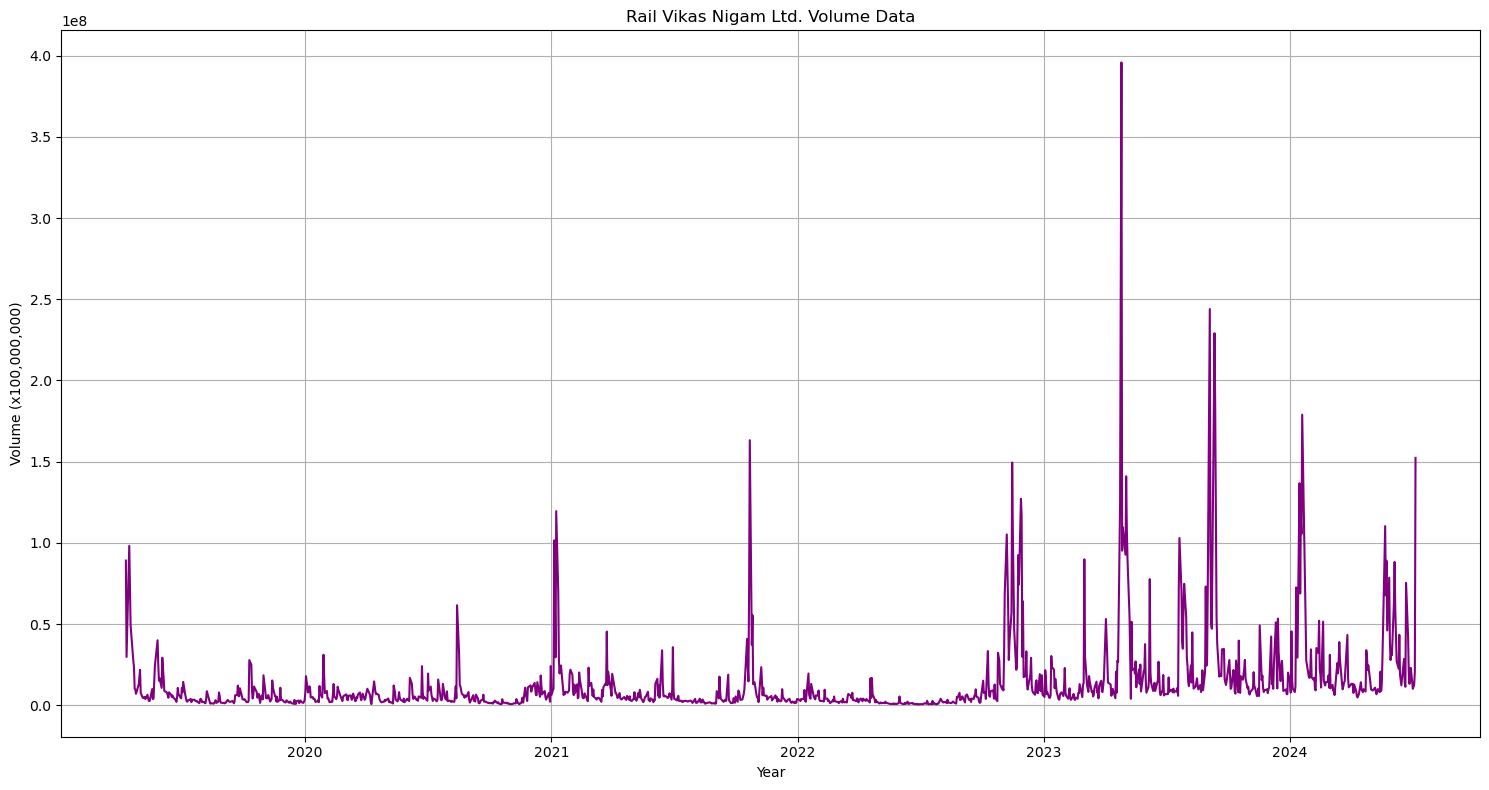

In [7]:
plt.figure(figsize = (15, 8))
plt.plot(data['Date'], data['Volume'], color = 'purple')
plt.title(f"{company} Volume Data")
plt.xlabel("Year")
plt.ylabel("Volume (x100,000,000)")
plt.grid(True)
plt.tight_layout()

#### Splitting dataset into train and test set, LSTM model building and training the model

In [8]:
training_size = int(len(data) * 0.8)
train = data[:training_size]
test = data[training_size:].copy()

close_data = data[['Close']]
dataset = close_data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[:training_size]
x_train, y_train = [], []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[training_size - 60:]
x_test, y_test = [], dataset[training_size:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

model = Sequential()
model.add(LSTM(64, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0012
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.4684e-04
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.4061e-04
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 9.0312e-05
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 1.2014e-04
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.0796e-04
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 6.1982e-05
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 8.1057e-05
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.0597e-04
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 7.8884e-05
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 5.9608e-05
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 6.3965e-05
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 7.2588e-05
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 6.6001e-05
Epoch 15/50
31/31 ━

#### Prediction of the stock price graph for the next 30 days

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


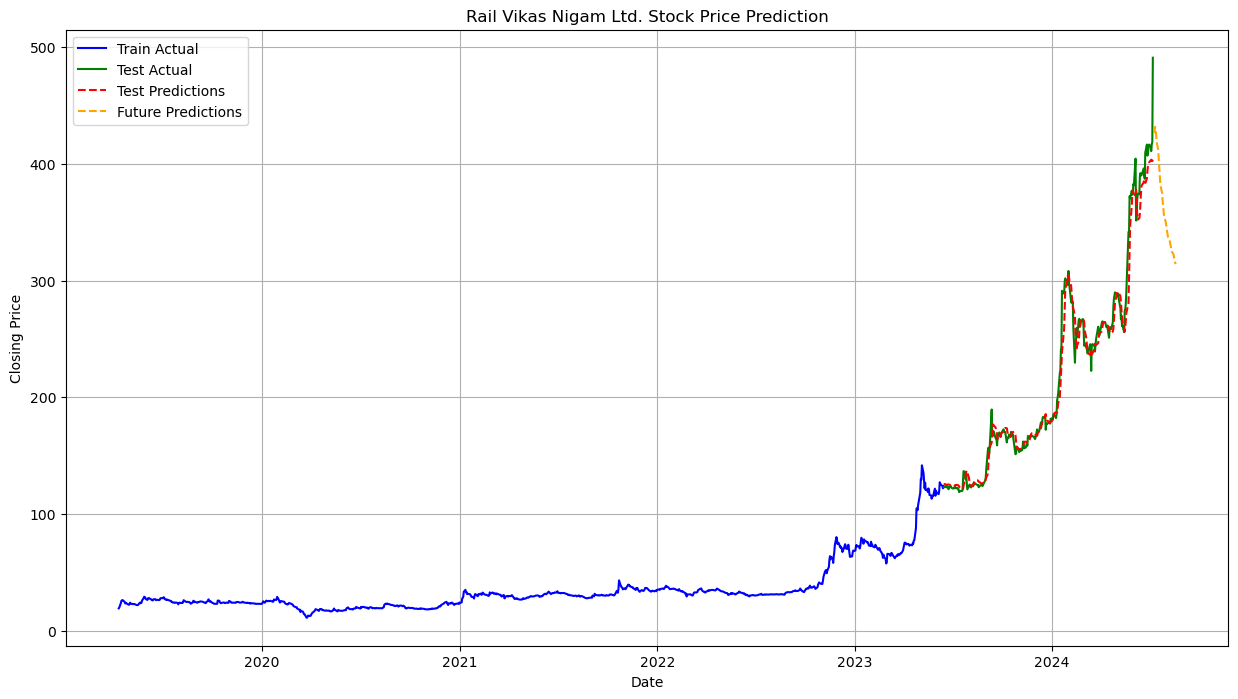

In [9]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

last_60_days_scaled = scaled_data[-60:]
x_future = last_60_days_scaled.reshape((1, 60, 1))

future_predictions = []

for _ in range(30):
    pred = model.predict(x_future, verbose=0)
    future_predictions.append(pred[0, 0])
    pred_scaled = np.expand_dims(pred, axis=0)
    x_future = np.append(x_future[:, 1:, :], pred_scaled, axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

future_dates = pd.date_range(start=test['Date'].iloc[-1], periods=31, freq='B')[1:]  # Next 30 business days
future_df = pd.DataFrame({'Date': future_dates, 'Predictions': future_predictions.flatten()})

extended_test = pd.concat([test, future_df], ignore_index=True)

plt.figure(figsize=(15, 8))
plt.plot(train['Date'], train['Close'], label='Train Actual', color='blue')
plt.plot(test['Date'], test['Close'], label='Test Actual', color='green')
plt.plot(test['Date'], predictions, label='Test Predictions', linestyle='--', color='red')
plt.plot(future_df['Date'], future_df['Predictions'], label='Future Predictions', linestyle='--', color='orange')
plt.title(f"{company} Stock Price Prediction")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

#### Printing the predicted closing price for the next 30 days

In [10]:
print("Next 30 Days Stock Closing Price Predictions:")
for date, price in zip(future_df['Date'], future_df['Predictions']):
    print(f"Date: {date.strftime('%Y-%m-%d')} - Predicted Closing Price: {price:.2f}")

Next 30 Days Stock Closing Price Predictions:
Date: 2024-07-08 - Predicted Closing Price: 426.35
Date: 2024-07-09 - Predicted Closing Price: 431.83
Date: 2024-07-10 - Predicted Closing Price: 430.33
Date: 2024-07-11 - Predicted Closing Price: 425.49
Date: 2024-07-12 - Predicted Closing Price: 418.99
Date: 2024-07-15 - Predicted Closing Price: 411.66
Date: 2024-07-16 - Predicted Closing Price: 404.01
Date: 2024-07-17 - Predicted Closing Price: 396.34
Date: 2024-07-18 - Predicted Closing Price: 388.91
Date: 2024-07-19 - Predicted Closing Price: 381.85
Date: 2024-07-22 - Predicted Closing Price: 375.27
Date: 2024-07-23 - Predicted Closing Price: 369.23
Date: 2024-07-24 - Predicted Closing Price: 363.74
Date: 2024-07-25 - Predicted Closing Price: 358.77
Date: 2024-07-26 - Predicted Closing Price: 354.29
Date: 2024-07-29 - Predicted Closing Price: 350.26
Date: 2024-07-30 - Predicted Closing Price: 346.60
Date: 2024-07-31 - Predicted Closing Price: 343.26
Date: 2024-08-01 - Predicted Closing